In [1]:
# Sulfur abundance: 7.17
# 12 + log((32 * S)/ 6.6 * 10 ** 23)
# S = 3.051 * 10 ** 17
# Abundance = S / 6.6 * 10 ** 23 = 4.623 * 10 ** -7
# Atom number is 3.275 * 10 ** 14 atom / cm ** 2
# For every neutral there are 744 excited
# assuming that ground state includes 80% of neutral Sulfur

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import pandas as pd

In [3]:
dataS = pd.read_csv('Sulfur1.txt', sep="\t")
Sw = dataS["Wave"] * 10
So = dataS["Osc"] * 1000 * 7.3

In [4]:
spec = astropy.io.ascii.read("solar_spectrum.txt")

Text(0, 0.5, 'Normalized Flux')

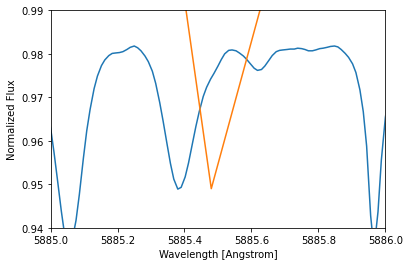

In [5]:
plt.plot(spec["col1"], spec["col2"] / 1e4)
# plt.vlines(5887.5, 0, 10000, color="red")
# plt.vlines(5892.5, 0, 10000, color="red")
plt.vlines(5887.5, 0, 1, color="red")
plt.vlines(5892.5, 0, 1, color="red")
plt.plot(Sw, So)
plt.xlim(5885, 5886)
plt.ylim(.94,.99)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

In [6]:
ind = np.where((spec["col1"] < 5885.58) & (spec["col1"] > 5885.23))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4
print("equivalent width (ew) = ", ew, " Angstrom")

equivalent width (ew) =  0.009446000000206185  Angstrom


In [7]:
np.log10(0.009446 / 5885.39)

-5.794527305757963

In [19]:
Numden = 10 ** 10.7 / 0.00013 / (5885.4 / 5000) / 1e14
# atom/cm^2 for Sulfur is 3.28 * 10 ** 14
print(Numden)

3.275296846873172


In [13]:
Energy = ((6.626 * 10 ** -34) * (3 * 10 ** 8)) / (5.8854 * 10 ** -7)
print(Energy, 'J')

3.3775104495871144e-19 J


In [15]:
Nab = np.exp((-1 * Energy) / ((1.38 * 10 ** -23) * (5800))) * 1
print(Nab)
# Assume that ground state includes 80% of neutral Sulfur

0.014701905424290571


In [21]:
NTotal = (Numden * 1e14) * (1 / .8) * (745)
print(NTotal)

3.050120188650641e+17


In [23]:
Abundance = 12 + np.log10((NTotal * 32)/(6.6 * 10 ** 23))
print(Abundance)

7.169922995645919
